<a href="https://colab.research.google.com/github/azizbahrululum76/projecttodatascientist/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis 

## Install Packages

vaderSentiment: It is a Python library that provides a pre-trained model called VADER (Valence Aware Dictionary and sEntiment Reasoner) for sentiment analysis. VADER is specifically designed for sentiment analysis of social media texts, taking into account the presence of emoticons, punctuation, and other linguistic features. It assigns sentiment scores to texts based on a lexicon of words and their intensity scores.

nltk (Natural Language Toolkit): It is a popular Python library for natural language processing (NLP) tasks. It provides various tools and resources for tasks like tokenization, stemming, tagging, parsing, and sentiment analysis. It also includes corpora and lexicons that can be used for training and analyzing text data.

In [2]:
!pip install vaderSentiment
!pip install nltk



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1.pandas: A library for data manipulation and analysis. It provides data structures and functions to efficiently work with structured data.

2.matplotlib.pyplot: A plotting library used to create visualizations in Python. It provides a MATLAB-like interface for creating various types of plots and charts.

3.seaborn: A data visualization library based on matplotlib. It provides a high-level interface for creating informative and visually appealing statistical graphics.

4.nltk (Natural Language Toolkit): A popular library for natural language processing (NLP) tasks. It provides various tools and resources for working with text data.

5.SentimentIntensityAnalyzer from nltk.sentiment: A class from NLTK used for sentiment analysis. It utilizes a lexicon-based approach to determine the sentiment of text.

6.word_tokenize from nltk.tokenize: A function for tokenizing text, i.e., splitting text into individual words or tokens.

7.stopwords from nltk.corpus: A collection of commonly used words in a language that are often removed during text analysis to focus on important content words.

8.WordNetLemmatizer from nltk.stem: A class for lemmatizing words, which reduces words to their base or dictionary form to improve analysis accuracy.

9.TextBlob: A library built on top of NLTK that provides an easy-to-use interface for common text processing tasks, including sentiment analysis.

10.SentimentIntensityAnalyzer from vaderSentiment.vaderSentiment: A class from the VADER (Valence Aware Dictionary and sEntiment Reasoner) library, which is a rule-based sentiment analysis tool specifically designed for social media texts.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VaderSentimentIntensityAnalyzer

##Mengunduh data stopwords dan model sentiment analyzer NLTK

In [4]:
# Mengunduh data stopwords dan model sentiment analyzer NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Membaca dataset

In [5]:
# Membaca dataset
data = pd.read_csv('Datasetprojpowerbi.csv')

## Variable Interpretation

In [7]:
# Variable Interpretation
"""
Genre: Type of complaints or reports made by students.
Reports: Content of the complaints or reports made by students.
Age: Age of the students.
GPA: Grade Point Average (GPA) of the students.
Year: Year of the complaint or report submission.
Count: Number of complaints or reports from students.
Gender: Gender of the students.
"""

'\nGenre: Type of complaints or reports made by students.\nReports: Content of the complaints or reports made by students.\nAge: Age of the students.\nGPA: Grade Point Average (GPA) of the students.\nYear: Year of the complaint or report submission.\nCount: Number of complaints or reports from students.\nGender: Gender of the students.\n'

## Analisis deskriptif

In [8]:
# Analisis deskriptif
print("Statistik Deskriptif:")
print(data.describe())

Statistik Deskriptif:
              Age         Gpa        Year  Count
count  478.000000  478.000000  478.000000  478.0
mean    21.313808    1.996883    2.633891    1.0
std      3.494509    1.137884    1.484321    0.0
min     16.000000    0.030000    1.000000    1.0
25%     18.000000    1.080000    1.000000    1.0
50%     21.000000    2.000000    2.000000    1.0
75%     24.000000    3.000000    4.000000    1.0
max     27.000000    4.630000    5.000000    1.0


##Sentiment analysis

The method used here employs a lexicon-based approach for sentiment analysis, which involves utilizing a pre-defined dictionary of words with associated sentiments. TextBlob utilizes an internal lexicon that contains words and phrases with their corresponding sentiments. The sentiment score is calculated based on the words found in the text by combining the sentiment scores of those words to produce an overall score.

In this approach, each word in the text is assigned a sentiment score based on its presence in the lexicon. The sentiment scores can range from negative to positive, with zero indicating a neutral sentiment. The scores of individual words are then aggregated or averaged to derive the overall sentiment score for the text.

It's important to note that lexicon-based approaches have limitations, as they heavily rely on the availability and accuracy of the lexicon. They may not capture the nuances and context-specific sentiments in the text accurately. Additionally, they may struggle with handling sarcasm, irony, or figurative language. However, lexicon-based sentiment analysis can still be effective for simpler text analysis tasks and provide useful insights.

It's worth mentioning that more advanced sentiment analysis techniques exist, such as machine learning-based approaches that learn from labeled data to predict sentiment. These methods can often capture more nuanced and context-specific sentiments, but they typically require a significant amount of labeled training data and more computational resources.

In [9]:
# Sentiment Analysis
def get_sentiment(text):
    if isinstance(text, str):  # Check if text is a string
        blob = TextBlob(text)
        sentiment_score = blob.sentiment.polarity
        if sentiment_score > 0:
            return 'Positive'
        elif sentiment_score < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # Handle NaN values

###Apply sentiment analysis to 'Reports' column

In [10]:
data['Sentiment'] = data['Reports'].apply(get_sentiment)

###Count sentiment categories

In [11]:
sentiment_counts = data['Sentiment'].value_counts()

###Plot sentiment distribution

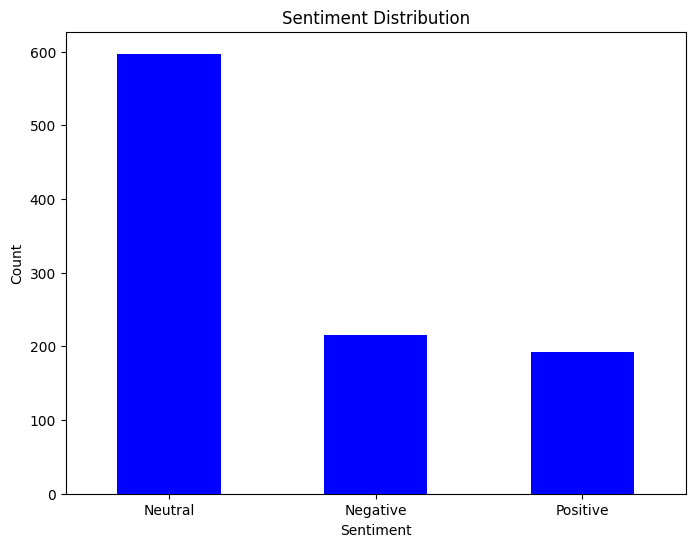

In [12]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('sentiment_distribution.png')  # Save the figure as an image
plt.show()

###save to excell

In [13]:
# Save sentiment counts to Excel
sentiment_counts.to_excel('sentiment_counts.xlsx', index=True, header=['Count'])

# Save the updated dataset to Excel
data.to_excel('data_with_sentiment.xlsx', index=False)

##grafik distribusi genre

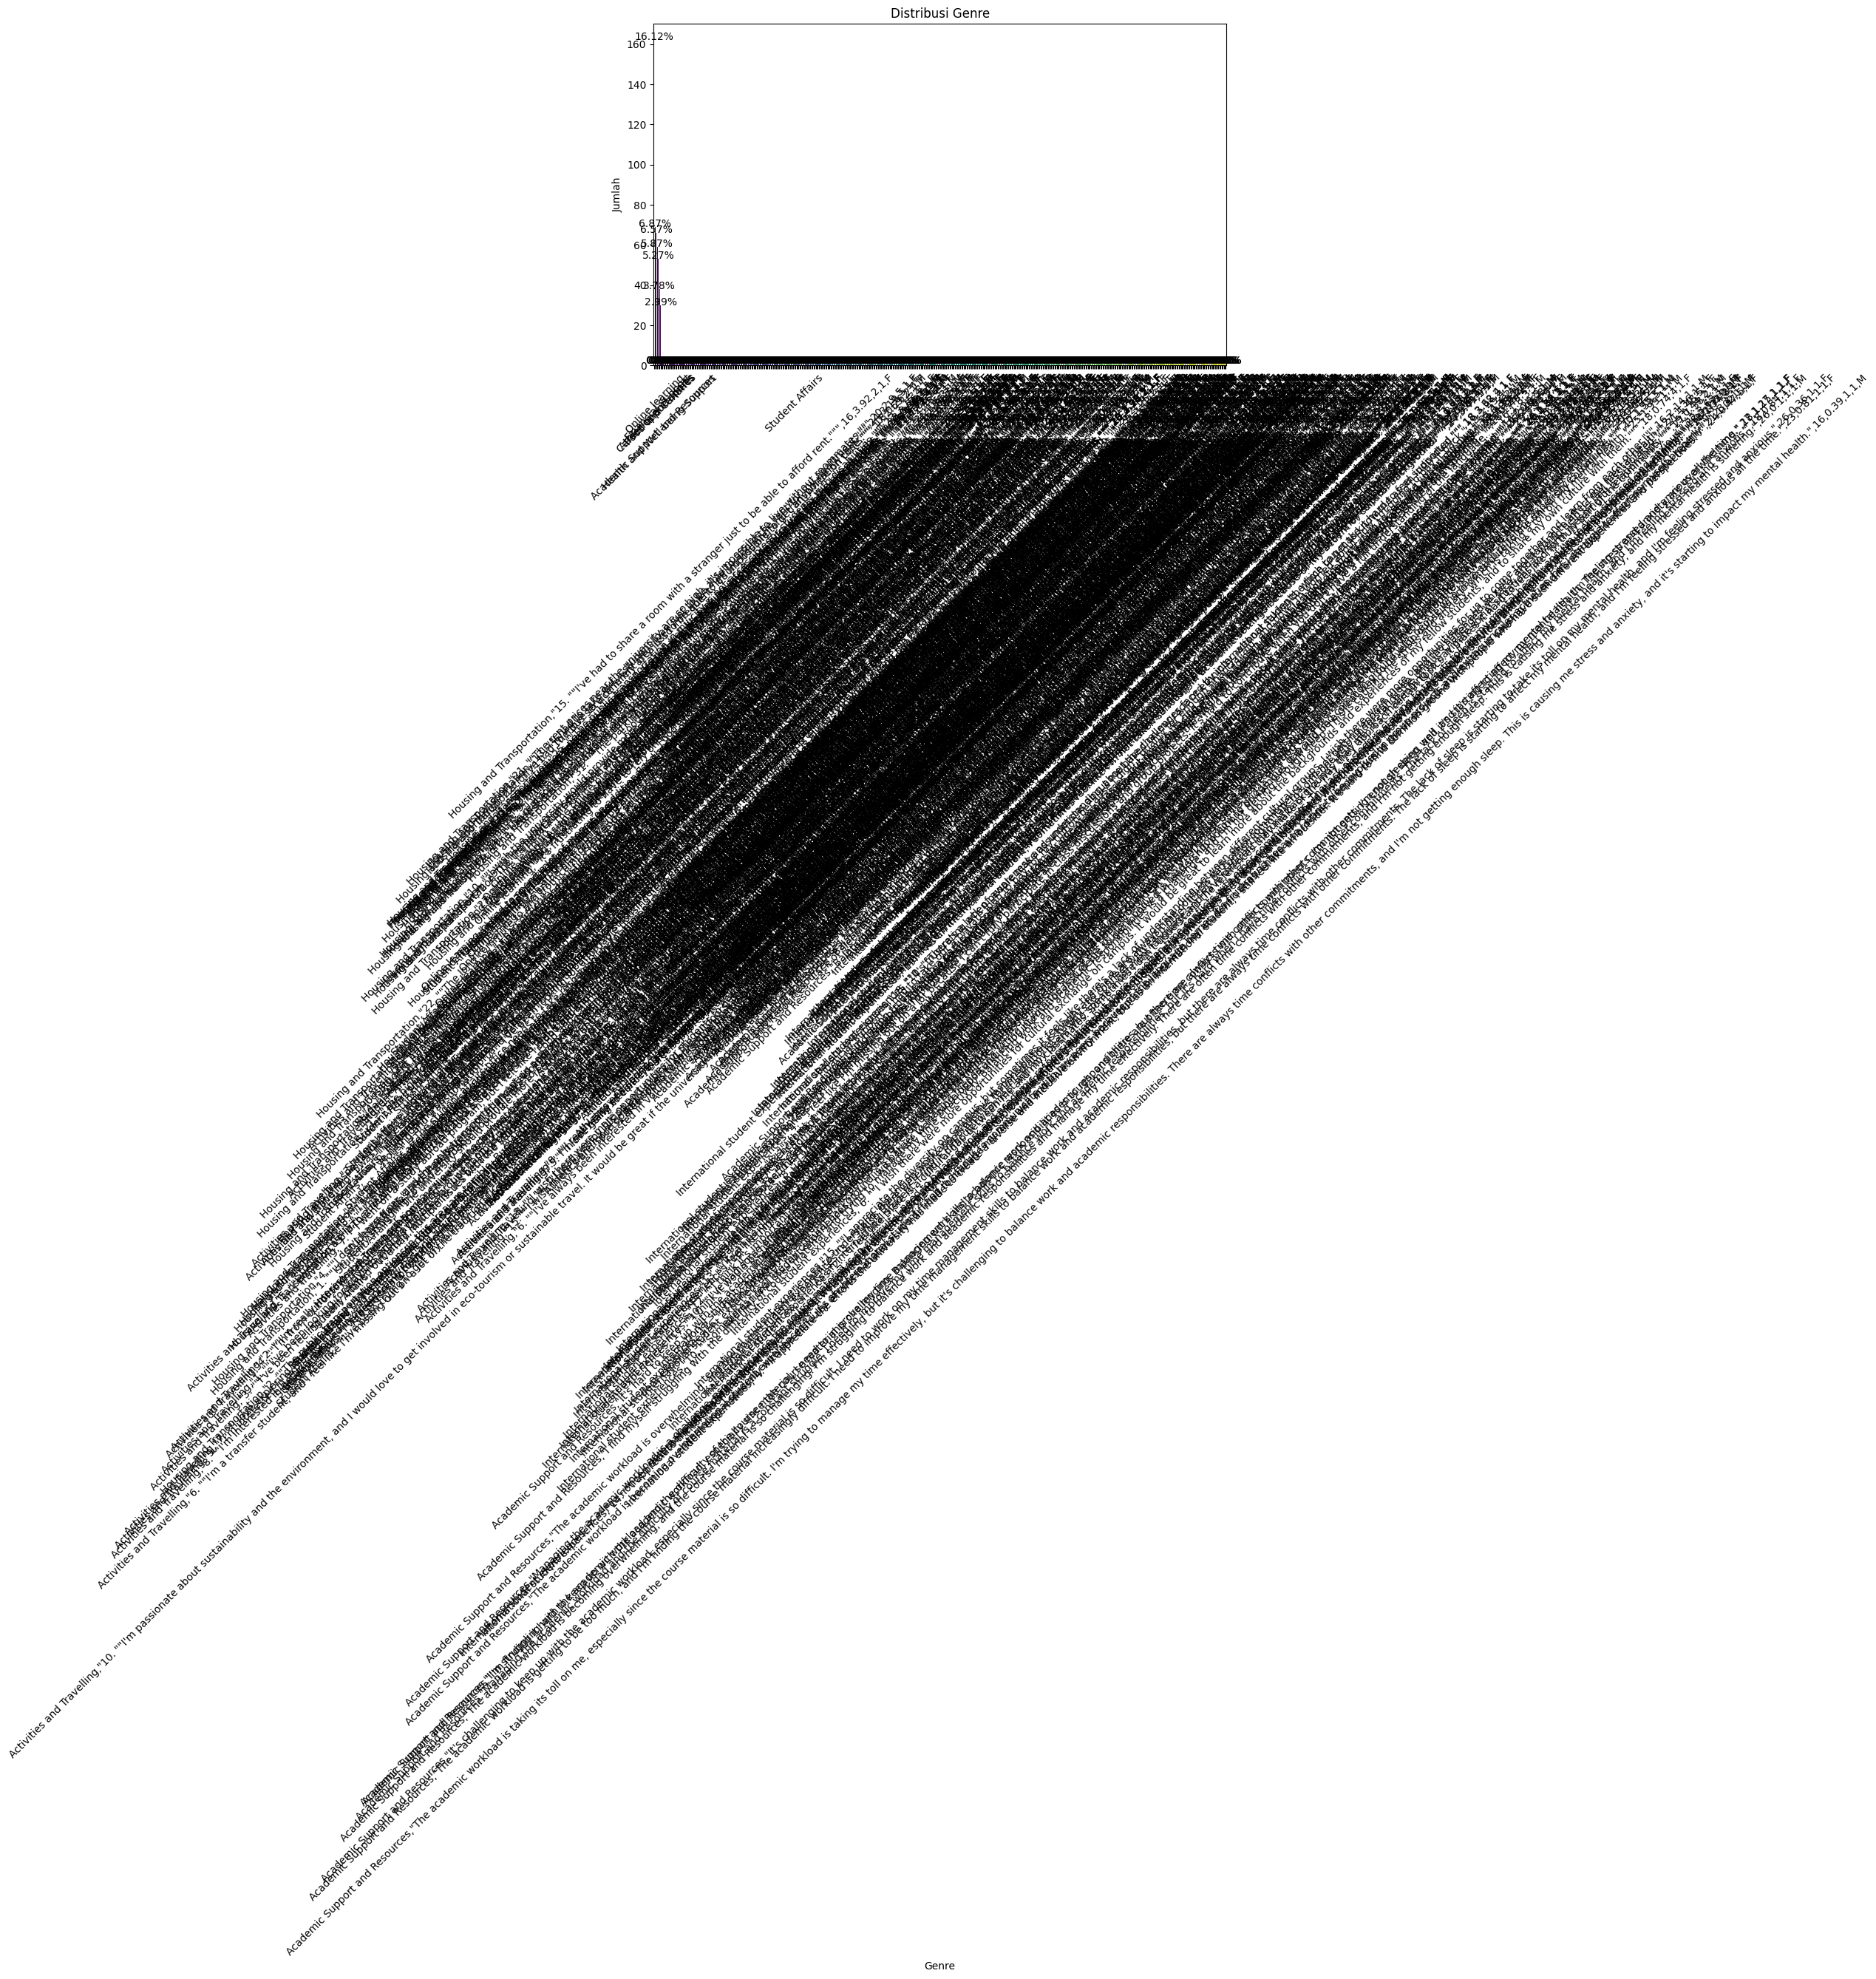

In [14]:
plt.figure(figsize=(10, 6))
genre_counts = data['Genre'].value_counts()

sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Menambahkan anotasi persentase di atas batang
total_count = len(data['Genre'])
for i, count in enumerate(genre_counts.values):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center')

plt.title('Distribusi Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah')

# Rotasi label sumbu x jika diperlukan
plt.xticks(rotation=45)

plt.show()


## Visualisasi distribusi sentimen menggunakan TextBlob

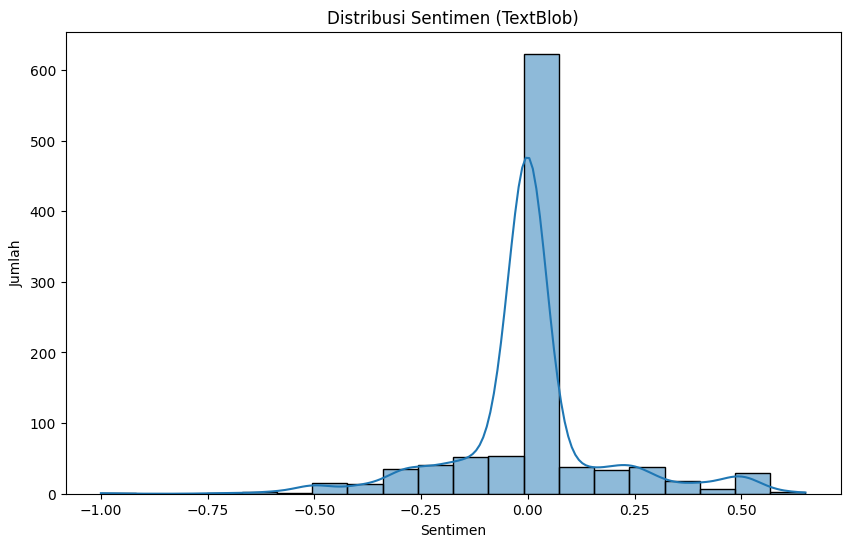

In [ ]:
# Visualisasi distribusi sentimen menggunakan TextBlob
data['TextBlobSentiment'] = data['Reports'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='TextBlobSentiment', bins=20, kde=True)
plt.title('Distribusi Sentimen (TextBlob)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

## Visualisasi distribusi sentimen menggunakan SentimentIntensityAnalyzer (NLTK)

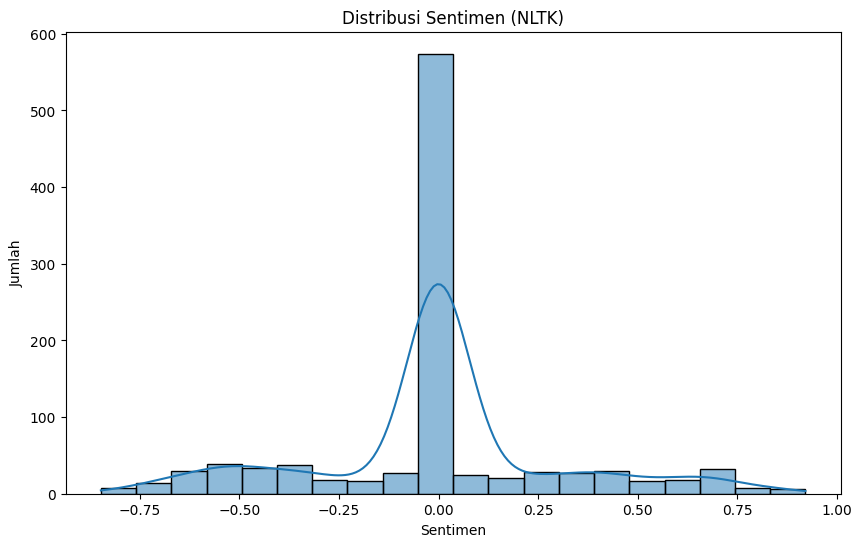

In [ ]:
# Visualisasi distribusi sentimen menggunakan SentimentIntensityAnalyzer (NLTK)
sia = SentimentIntensityAnalyzer()
data['NLTKSentiment'] = data['Reports'].apply(lambda x: sia.polarity_scores(x)['compound'])
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='NLTKSentiment', bins=20, kde=True)
plt.title('Distribusi Sentimen (NLTK)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

## Visualisasi distribusi sentimen menggunakan SentimentIntensityAnalyzer (VADER)

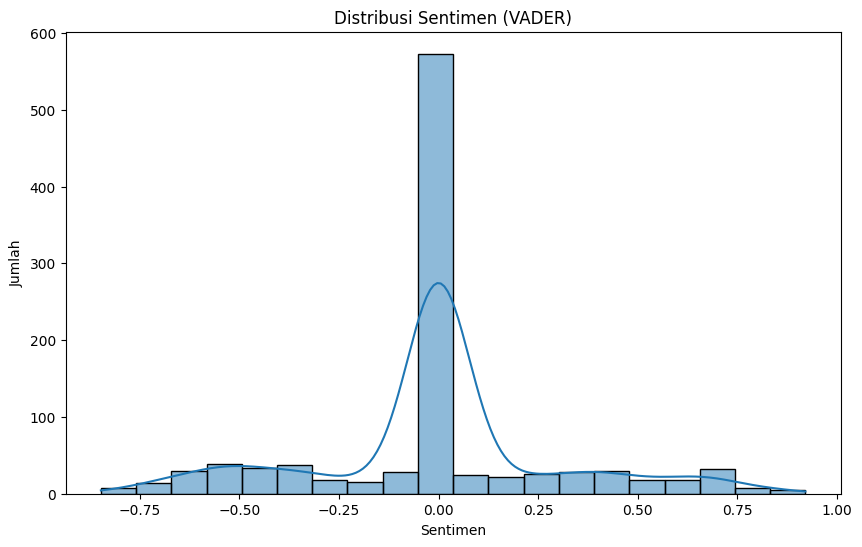

In [ ]:
# Visualisasi distribusi sentimen menggunakan SentimentIntensityAnalyzer (VADER)
vader = VaderSentimentIntensityAnalyzer()
data['VADERSentiment'] = data['Reports'].apply(lambda x: vader.polarity_scores(x)['compound'])
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='VADERSentiment', bins=20, kde=True)
plt.title('Distribusi Sentimen (VADER)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()